In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('daily_expenses.csv', parse_dates=['Date'])
print("Dataset shape:", df.shape)

Dataset shape: (1061, 6)


In [3]:
# Display the first few records
print("\nFirst 20 records:")
print(df.head(20))


First 20 records:
         Date       Category  Amount_NTD                          Description  \
0  2025-01-01           Meal         100                           Lunch meal   
1  2025-01-01           Meal         107                          Dinner meal   
2  2025-01-01      Transport         266            Monthly transport expense   
3  2025-01-01  Entertainment          99       Spotify subscription (student)   
4  2025-01-01  Entertainment         600            ChatGPT Plus subscription   
5  2025-01-01  Entertainment         200              WuxiaWorld subscription   
6  2025-01-01      Groceries         869    Monthly groceries/household items   
7  2025-01-02           Meal          99                           Lunch meal   
8  2025-01-02           Meal         107                          Dinner meal   
9  2025-01-03           Meal          91                           Lunch meal   
10 2025-01-03           Meal         104                          Dinner meal   
11 2025-0

In [4]:
# Basic info and data types
print("\nDataframe Info:")
print(df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1061 non-null   datetime64[ns]
 1   Category        1061 non-null   object        
 2   Amount_NTD      1061 non-null   int64         
 3   Description     1061 non-null   object        
 4   Payment_Method  894 non-null    object        
 5   Time            896 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 49.9+ KB
None


In [5]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                Date   Amount_NTD
count                           1061  1061.000000
mean   2025-07-01 05:05:22.337417472   363.026390
min              2025-01-01 00:00:00    40.000000
25%              2025-04-01 00:00:00    82.000000
50%              2025-07-01 00:00:00    96.000000
75%              2025-10-01 00:00:00   114.000000
max              2025-12-31 00:00:00  9000.000000
std                              NaN  1248.813387


In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Date                0
Category            0
Amount_NTD          0
Description         0
Payment_Method    167
Time              165
dtype: int64


In [7]:
# Explore unique values for categorical columns
print("\nUnique categories in 'Category':")
print(df['Category'].unique())


Unique categories in 'Category':
['Meal' 'Transport' 'Entertainment' 'Groceries' 'Income' 'Laundry'
 'Coffee' 'Gym' 'Food & Drink']


In [8]:
print("\nUnique payment methods:")
print(df['Payment_Method'].unique())


Unique payment methods:
['Cash' nan 'Card']


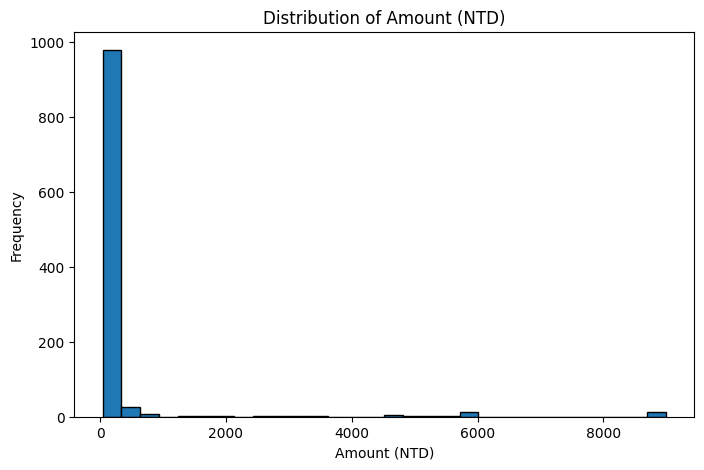

In [9]:
# Plot the distribution of Amount_NTD
plt.figure(figsize=(8, 5))
plt.hist(df['Amount_NTD'], bins=30, edgecolor='black')
plt.title("Distribution of Amount (NTD)")
plt.xlabel("Amount (NTD)")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Explore expenses by category: average amount per category
avg_by_category = df.groupby('Category')['Amount_NTD'].mean().reset_index()
print("\nAverage amount by category:")
print(avg_by_category)


Average amount by category:
        Category   Amount_NTD
0         Coffee    50.091463
1  Entertainment   299.666667
2   Food & Drink   600.000000
3      Groceries   705.500000
4            Gym   900.000000
5         Income  5663.404255
6        Laundry    60.000000
7           Meal   106.445205
8      Transport   341.416667


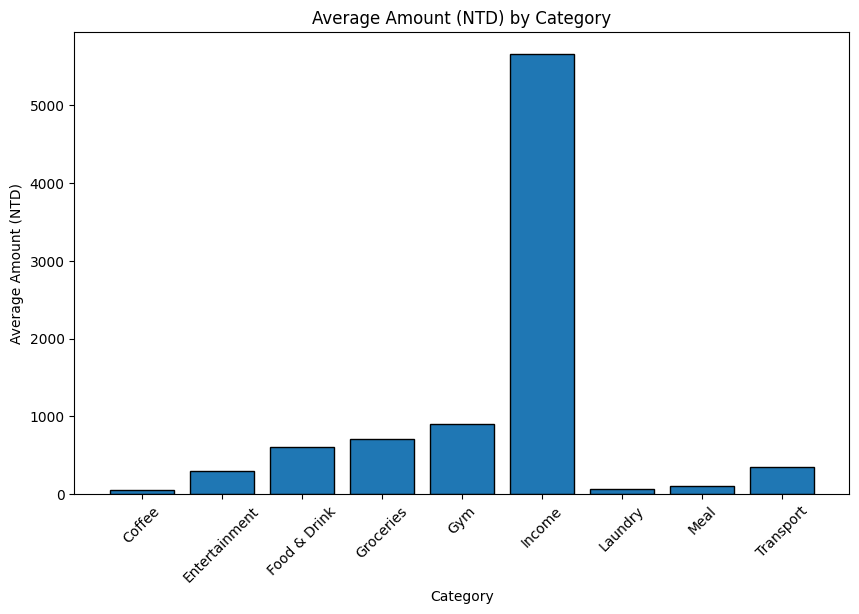

In [11]:
# Bar plot for average amount per category
plt.figure(figsize=(10, 6))
plt.bar(avg_by_category['Category'], avg_by_category['Amount_NTD'], edgecolor='black')
plt.title("Average Amount (NTD) by Category")
plt.xlabel("Category")
plt.ylabel("Average Amount (NTD)")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Check for duplicate records if any
duplicates = df.duplicated().sum()
print("\nNumber of duplicate records:", duplicates)

# Additional cleaning suggestions:
# 1. You might want to fill or drop missing values in 'Payment_Method' and 'Time' if they're not useful.
# 2. If needed, convert 'Time' to a proper time format (or extract hour/minute) if you plan to analyze time-of-day trends.
# 3. Consider encoding categorical features for your ML models.



Number of duplicate records: 0


In [13]:
# Create a 'Month' column for grouping (formatted as YYYY-MM)
df['Month'] = df['Date'].dt.to_period('M')

In [14]:

# Calculate the total value of each category each month
monthly_totals = df.groupby(['Month', 'Category'])['Amount_NTD'].sum().reset_index()
print("Monthly Totals by Category:")
print(monthly_totals)

Monthly Totals by Category:
      Month       Category  Amount_NTD
0   2025-01         Coffee         707
1   2025-01  Entertainment         899
2   2025-01      Groceries         869
3   2025-01         Income       16778
4   2025-01        Laundry         240
..      ...            ...         ...
87  2025-12            Gym         600
88  2025-12         Income       23272
89  2025-12        Laundry         240
90  2025-12           Meal        6635
91  2025-12      Transport         249

[92 rows x 3 columns]


In [15]:
# Pivot the data to have months as rows and categories as columns
pivot_totals = monthly_totals.pivot(index='Month', columns='Category', values='Amount_NTD').fillna(0)

# Calculate income and expenses separately
# Assuming 'Income' indicates earnings and all other categories are expenses.
income = pivot_totals.get('Income', 0)
expenses = pivot_totals.drop(columns='Income', errors='ignore').sum(axis=1)
net_income = income - expenses

# Display net income per month
net_df = pd.DataFrame({
    'Income': income,
    'Expenses': expenses,
    'Net (Income - Expenses)': net_income
})
print("\nMonthly Income, Expenses and Net Difference:")
print(net_df)


Monthly Income, Expenses and Net Difference:
          Income  Expenses  Net (Income - Expenses)
Month                                              
2025-01  16778.0    9569.0                   7209.0
2025-02  23127.0    9710.0                  13417.0
2025-03  21667.0   10681.0                  10986.0
2025-04  22074.0    9677.0                  12397.0
2025-05  23335.0   10883.0                  12452.0
2025-06  21509.0   10027.0                  11482.0
2025-07  23184.0    9474.0                  13710.0
2025-08  23199.0    9469.0                  13730.0
2025-09  22000.0    9395.0                  12605.0
2025-10  22724.0   10792.0                  11932.0
2025-11  23311.0    9242.0                  14069.0
2025-12  23272.0   10072.0                  13200.0


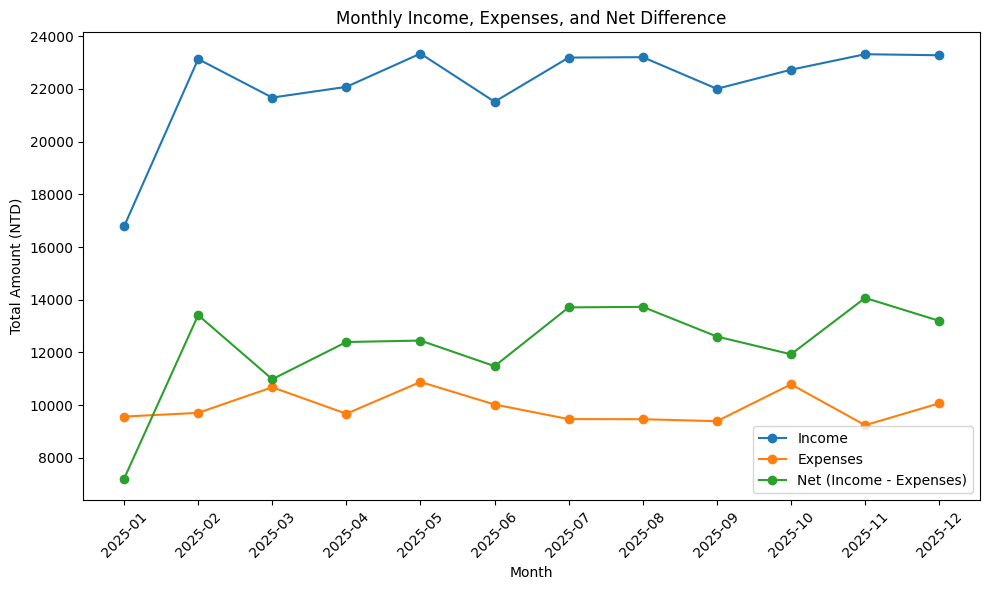

In [16]:
# Plot monthly income, expenses, and net difference
plt.figure(figsize=(10, 6))
plt.plot(net_df.index.astype(str), net_df['Income'], marker='o', label='Income')
plt.plot(net_df.index.astype(str), net_df['Expenses'], marker='o', label='Expenses')
plt.plot(net_df.index.astype(str), net_df['Net (Income - Expenses)'], marker='o', label='Net (Income - Expenses)')
plt.xlabel('Month')
plt.ylabel('Total Amount (NTD)')
plt.title('Monthly Income, Expenses, and Net Difference')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 2000x1600 with 0 Axes>

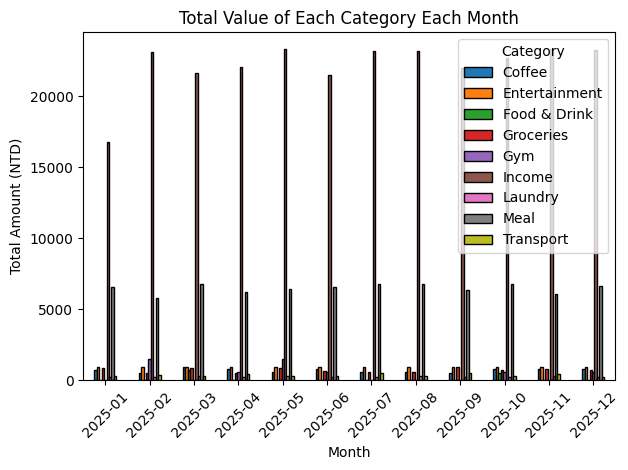

In [18]:
# Bar chart: total value of each category each month
plt.figure(figsize=(20, 16))
monthly_pivot = monthly_totals.pivot(index='Month', columns='Category', values='Amount_NTD').fillna(0)
monthly_pivot.plot(kind='bar', edgecolor='black')
plt.title('Total Value of Each Category Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount (NTD)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

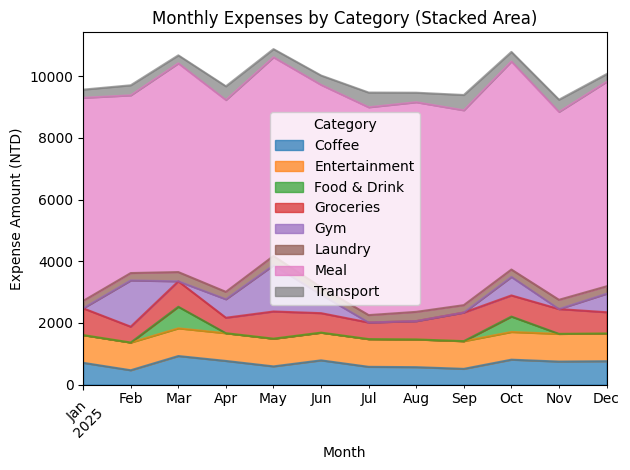

In [19]:
# Additional Visualization: Stacked Area Plot of monthly expenses (excluding Income)
# This shows how each expense category contributes to total spending per month.
expenses_df = df[df['Category'] != 'Income']
expenses_totals = expenses_df.groupby(['Month', 'Category'])['Amount_NTD'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 8))
expenses_totals.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Monthly Expenses by Category (Stacked Area)')
plt.xlabel('Month')
plt.ylabel('Expense Amount (NTD)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

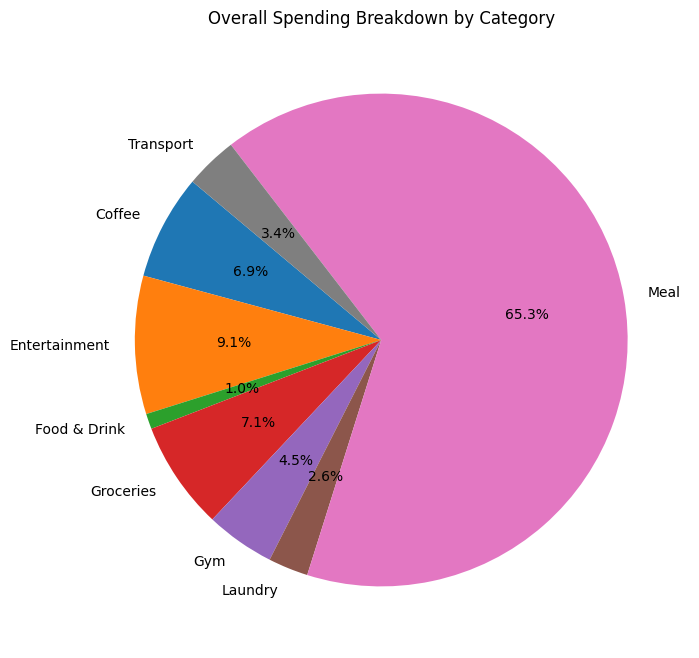

In [20]:
# Additional Visualization: Overall Spending Breakdown by Expense Category (Pie Chart)
overall_expenses = expenses_df.groupby('Category')['Amount_NTD'].sum()
plt.figure(figsize=(8, 8))
plt.pie(overall_expenses, labels=overall_expenses.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Spending Breakdown by Category')
plt.show()